In [174]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Data Importing, Cleaning, & Filtering

In [175]:
df = pd.read_csv("https://raw.githubusercontent.com/collective-action/tech/master/actions.csv")
df["date"] = pd.to_datetime(df["date"])  # cast date col to datetime64
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

,id,date,sources,actions,struggles,employment_types,description,online,locations,companies,workers,tags,author,latlngs,addresses
0,314,1970-01-01,['https://www.theguardian.com/commentisfree/20...,['resources'],"['ethics', 'discrimination']","['white collar workers', 'inhouse workers']",Black IBM employees founded the National Black...,None,['usa'],['ibm'],None,['antiracism'],['nataliyaned'],"[(44.05795005, -92.50701462052399)]","['IBM, Rochester, Olmsted County, Minnesota, 5..."
1,313,1970-10-08,['https://www.dissentmagazine.org/online_artic...,"['protest', 'boycott']",['ethics'],"['white collar workers', 'inhouse workers']",Polaroid workers affiliated with the Polaroid ...,None,['cambridge-massachusetts-usa'],['polaroid'],2,"['antiracism', 'surveillance']",['nataliyaned'],None,None
2,322,1970-12-01,['https://archive.scienceforthepeople.org/vol-...,['union drive'],['unfair labor practices'],"['white collar workers', 'blue collar workers']",The Committee to Plan a Computer Union meets t...,None,['new york city-new york-usa'],None,None,None,['nataliyaned'],"[(40.7127281, -74.0060152)]","['New York, United States of America']"
3,323,1973-01-01,['https://archive.scienceforthepeople.org/vol-...,['union drive'],['unfair labor practices'],"['white collar workers', 'inhouse workers']",Workers at Silicon Valley conglomerate Smith-C...,None,['california-usa'],['smith-corona-marchant'],50,None,['nataliyaned'],None,None
4,1,1979-09-01,['https://twitter.com/clancynewyork/status/117...,['protest'],['ethics'],['white collar workers'],"IBM workers formed an organization, IBM: Speak...",None,['worldwide'],['ibm'],None,['international_solidarity'],['nataliyaned'],None,None


In [176]:
df["struggles"] = df["struggles"].astype(str).str.strip("[]\'\'")
df["actions"] = df["actions"].astype(str).str.strip("[]\'\'")
df["companies"] = df["companies"].astype(str).str.strip("[]\'\'")
df["employment_types"] = df["employment_types"].astype(str).str.strip("[]\'\'")
df["sources"] = df["sources"].astype(str).str.strip("[]\'\'")
df["tags"] = df["tags"].astype(str).str.strip("[]\'\'")
df["locations"] = df["locations"].astype(str).str.strip("[]\'\'")

df["struggles"] = df["struggles"].astype(str).str.replace("'", "")
df["actions"] = df["actions"].astype(str).str.replace("'", "")
df["companies"] = df["companies"].astype(str).str.replace("'", "")
df["employment_types"] = df["employment_types"].astype(str).str.replace("'", "")
df["sources"] = df["sources"].astype(str).str.replace("'", "")
df["tags"] = df["tags"].astype(str).str.replace("'", "")
df["locations"] = df["locations"].astype(str).str.replace("'", "")

In [177]:
df2020 = df[df["date"] >= "2020"]
df2020 = df2020.assign(coronavirus=["coronavirus-related" if ("coronavirus" in x) else "non-coronavirus-related" for x in df2020["tags"]])

In [178]:
df2020.head()

,id,date,sources,actions,struggles,employment_types,description,online,locations,companies,workers,tags,author,latlngs,addresses,coronavirus
230,324,2020-01-01,https://www.reuters.com/article/us-hongkong-pr...,union representation,unfair labor practices,white collar workers,The Hong Kong Information Technology Workers’ ...,None,hong kong-china,None,280,"trade union, politics",['nataliyaned'],"[(22.2793278, 114.1628131)]","['香港島 Hong Kong Island, 香港 Hong Kong, China 中国']",non-coronavirus-related
231,224,2020-01-13,https://www.vice.com/amp/en_us/article/884npb/...,protest,pay and benefits,"blue collar workers, gig workers","Many of the app's 130,000 workers claim to hav...",True,usa,instacart,None,None,['organizejs'],None,None,non-coronavirus-related
232,225,2020-01-26,https://www.washingtonpost.com/technology/2020...,open letter,ethics,white collar workers,Amazon Employees for Climate Action published ...,True,None,amazon,364,climate_change,['nataliyaned'],None,None,non-coronavirus-related
233,226,2020-02-03,https://www.vice.com/en_ca/article/qjdvgm/inst...,union representation,"pay and benefits, working conditions","blue collar workers, gig workers",A group of Instacart employees in the Chicago ...,None,chicago-illinois-usa,instacart,10,None,['organizejs'],None,None,non-coronavirus-related
234,227,2020-02-03,https://www.nbcnews.com/news/all/amazon-worker...,protest,ethics,white collar workers,Members of Amazon Employees for Climate Justic...,True,None,amazon,3,None,['nataliyaned'],None,None,non-coronavirus-related


In [179]:
covid_df = df2020[["coronavirus" in x for x in df2020["tags"]]]
covid_df.head()

,id,date,sources,actions,struggles,employment_types,description,online,locations,companies,workers,tags,author,latlngs,addresses,coronavirus
242,235,2020-03-06,https://fortune.com/2020/03/10/gig-workers-pet...,open letter,"working conditions, unfair labor practices",gig workers,Gig Workers Rising launched a petition calling...,True,california-usa,"uber, lyft, instacart, doordash",900,coronavirus,['organizejs'],"[(37.7899898, -122.3999799), (37.7509149, -122...","['Uber, 555, Market Street, Financial District...",coronavirus-related
243,236,2020-03-12,https://www.vice.com/en_us/article/n7jkdx/bari...,"open letter, legal action",job security,"blue collar workers, contract workers",A group of five baristas who operate the espre...,None,san francisco-california-usa,slack,5,"coworker_solidarity, fund_raising, coronavirus",['organizejs'],"[(35.2960341, -120.6532192)]","['Slack Street, San Luis Obispo, San Luis Obis...",coronavirus-related
245,238,2020-03-17,https://www.theverge.com/2020/3/17/21184495/go...,protest,unfair labor practices,"white collar workers, inhouse workers",Pittsburgh's office Google contractors employe...,None,pittsburgh-pennsylvania-usa,google,10,"coworker_solidarity, coronavirus",['organizejs'],None,None,coronavirus-related
246,239,2020-03-17,https://www.theverge.com/2020/3/17/21184495/go...,open letter,unfair labor practices,"white collar workers, inhouse workers",A group of Google employees has sent a memo to...,True,usa,google,None,"coworker_solidarity, coronavirus",['organizejs'],"[(42.3627717, -71.087257)]","['Google, 355, Main Street, East Cambridge, Ca...",coronavirus-related
247,240,2020-03-17,https://medium.com/@amazonemployeesclimatejust...,open letter,working conditions,"blue collar workers, white collar workers",Over 5000 Amazon employees signed an open lett...,None,new york city-new york-usa,amazon,5210,"coronavirus, coworker_solidarity",['nataliyaned'],"[(40.722465, -73.9977307)]","['Amazon, 72, Spring Street, Little Italy, Man...",coronavirus-related


In [180]:
non_covid_df = df2020[~np.array(["coronavirus" in x for x in df2020["tags"]])]
non_covid_df.head()

,id,date,sources,actions,struggles,employment_types,description,online,locations,companies,workers,tags,author,latlngs,addresses,coronavirus
230,324,2020-01-01,https://www.reuters.com/article/us-hongkong-pr...,union representation,unfair labor practices,white collar workers,The Hong Kong Information Technology Workers’ ...,None,hong kong-china,None,280,"trade union, politics",['nataliyaned'],"[(22.2793278, 114.1628131)]","['香港島 Hong Kong Island, 香港 Hong Kong, China 中国']",non-coronavirus-related
231,224,2020-01-13,https://www.vice.com/amp/en_us/article/884npb/...,protest,pay and benefits,"blue collar workers, gig workers","Many of the app's 130,000 workers claim to hav...",True,usa,instacart,None,None,['organizejs'],None,None,non-coronavirus-related
232,225,2020-01-26,https://www.washingtonpost.com/technology/2020...,open letter,ethics,white collar workers,Amazon Employees for Climate Action published ...,True,None,amazon,364,climate_change,['nataliyaned'],None,None,non-coronavirus-related
233,226,2020-02-03,https://www.vice.com/en_ca/article/qjdvgm/inst...,union representation,"pay and benefits, working conditions","blue collar workers, gig workers",A group of Instacart employees in the Chicago ...,None,chicago-illinois-usa,instacart,10,None,['organizejs'],None,None,non-coronavirus-related
234,227,2020-02-03,https://www.nbcnews.com/news/all/amazon-worker...,protest,ethics,white collar workers,Members of Amazon Employees for Climate Justic...,True,None,amazon,3,None,['nataliyaned'],None,None,non-coronavirus-related


# Visualization Function

In [181]:
'''
Function: vizcolumn(df, col, limit = None, include = None, remove = None, printlabels = False)
- df: Properly cleaned and formatted pandas dataframe.
- col: Column of interest in `df`.
- limit: Default `None`, will output all labels. The max number of labels in outputted chart.
- include: Default `None`. List of specific columns to include. 
  The number of labels to be included has to be less than `limit`, if defined.
- remove: Default `None`. List of specific columns to not include.
- printLabels: Default `False`. Print list of unique labels.

Output: None

Prints: Error messages or chart
'''

def vizcolumn(df, col, limit = None, include = None, remove = None, printLabels = False, name = None):
    '''Error Checking'''
    if not col in df.columns:
        print(col + "is not a column in df.")
        return None
    
    if (limit or limit == 0 or limit) and include:
        if len(include) > limit:
            print("Number of labels to include is greater than the given label limit.")
            return None
    
    if include and remove:
        union = include.extend(remove)
        if not len(set(union)) == len(include) + len(remove):
            print("Columns cannot be both included and removed.")
            return None
    
    '''Obtaining unique label values, checking the labels in `include`, 
    and removing the labels in `remove`'''
    lst = []
    for i in df[col].unique():
        lst.extend(i.split(", "))
        
    lst = list(set(lst))
    
    # Supplementary Error Checking
    if include:
        for i in include:
            if not i in lst:
                print(i + "is not an available label.")
                return None
    
    if remove:
        for r in remove:
            try:
                lst.remove(r)
            except ValueError:
                pass
            
    '''Print list of unique labels, if desired'''
    if printLabels:
        print(lst)
    
    ''' Counting instances of all label values'''
    count = []
    for i in lst:
        count.append(sum(df[col].str.contains(i)))

    '''Limiting to desired number of labels, including specified labels'''
    include_list = []
    include_count = []
    if include:
        for i in include:
            ind = lst.index(i)
            lst.remove(i)
            include_list.append(i)

            i_count = count.pop(ind)
            include_count.append(i_count)
        limit = limit - len(include)

    if limit:                
        sorted_list = sorted(zip(lst, count), key = lambda x: x[1], reverse = True)
        sorted_list = sorted_list[:limit]
        
        lst, count = [], []
        for i, j in sorted_list:
            lst.append(i)
            count.append(j)
            
    lst.extend(include_list)
    count.extend(include_count)
    
    '''Print plot'''
    col_df = pd.DataFrame({col: lst, "count": count})
    
    if name:
        plot_title = name
    else:
        plot_title = "Number of Occurrence by " + col
    
    col_df.plot(kind = "barh", x = col, y = "count", title = plot_title, legend = False)
    plt.show()

# Basic Visuals

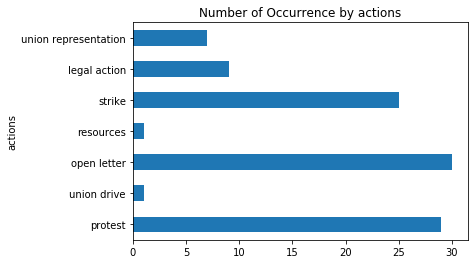

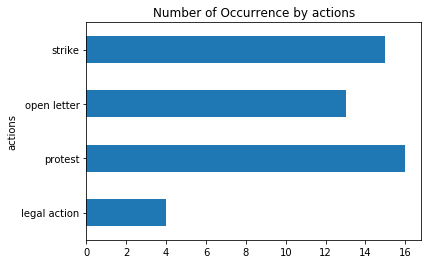

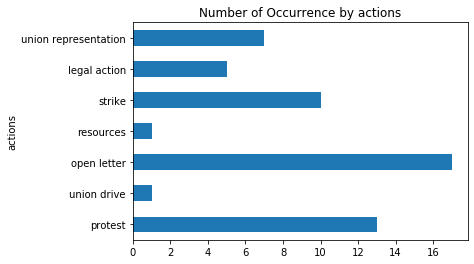

In [182]:
vizcolumn(df2020, "actions")
vizcolumn(covid_df, "actions")
vizcolumn(non_covid_df, "actions")

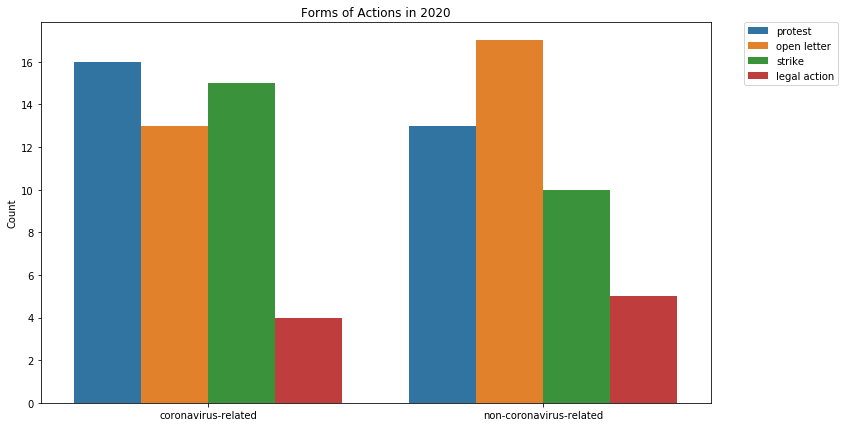

In [183]:
import seaborn as sns

lst = []
for i in df2020["actions"].unique():
    lst.extend(i.split(", "))

lst = list(set(lst))

lst.remove("union representation")
lst.remove("union drive")
lst.remove("resources")

count = []
for i in lst:
    count.append(sum(df2020[df2020["coronavirus"] == "coronavirus-related"]["actions"].str.contains(i)))
    
coronavirus_related_col_df = pd.DataFrame({"coronavirus": "coronavirus-related", "actions": lst, "count": count})

count = []
for i in lst:
    count.append(sum(df2020[df2020["coronavirus"] == "non-coronavirus-related"]["actions"].str.contains(i)))
    
non_coronavirus_related_col_df = pd.DataFrame({"coronavirus": "non-coronavirus-related", "actions": lst, "count": count})

actions_df = pd.concat([coronavirus_related_col_df, non_coronavirus_related_col_df])

fig = plt.gcf()
fig.set_size_inches(12, 7)

ax = sns.barplot(x="coronavirus", y="count", hue="actions", data=actions_df)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title("Forms of Actions in 2020")
ax.set_xlabel("")
ax.set_ylabel("Count");

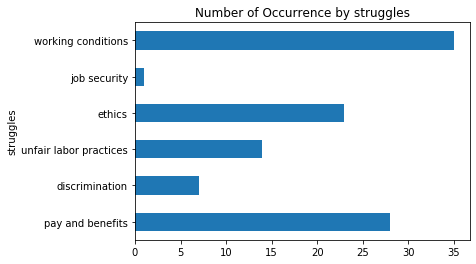

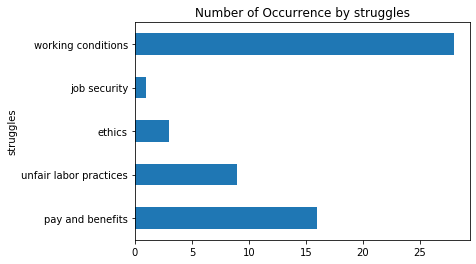

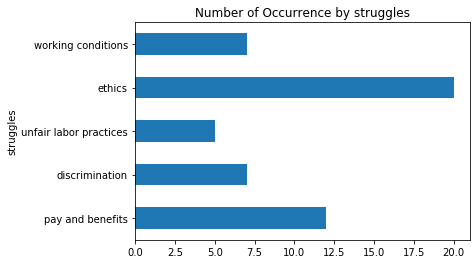

In [184]:
vizcolumn(df2020, "struggles", remove = ["na"])
vizcolumn(covid_df, "struggles", remove = ["na"])
vizcolumn(non_covid_df, "struggles", remove = ["na"])

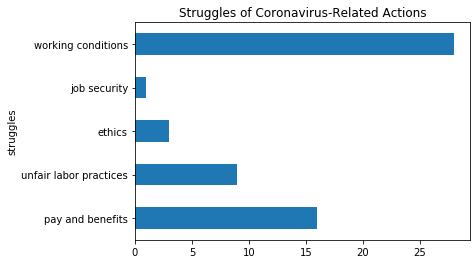

In [185]:
vizcolumn(covid_df, "struggles", remove = ["na"], name = "Struggles of Coronavirus-Related Actions")

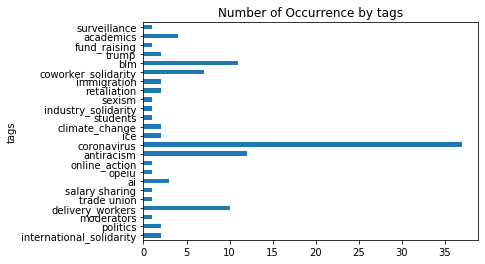

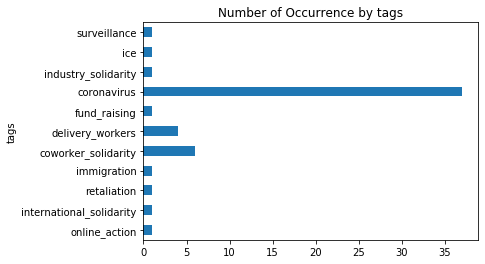

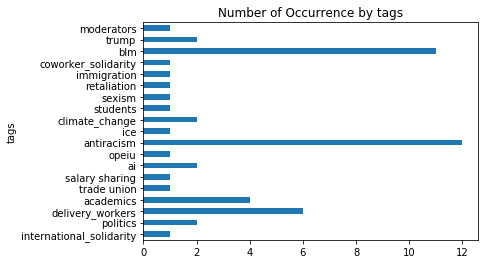

In [186]:
vizcolumn(df2020, "tags", remove = ["None", "na"])
vizcolumn(covid_df, "tags", remove = ["None", "na"])
vizcolumn(non_covid_df, "tags", remove = ["None", "na"])

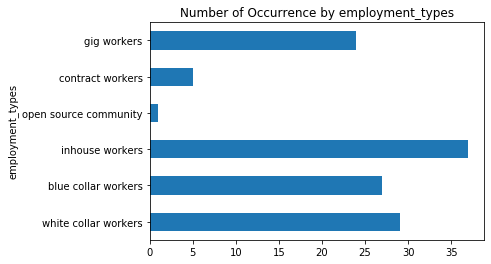

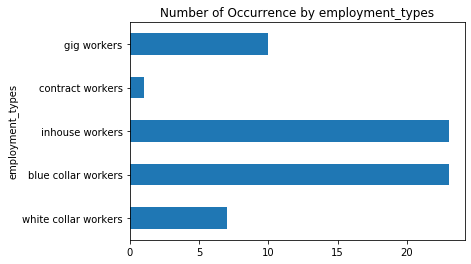

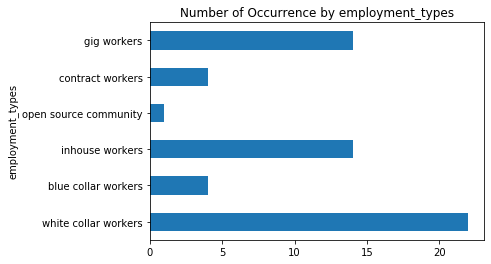

In [187]:
vizcolumn(df2020, "employment_types", remove = ["na"])
vizcolumn(covid_df, "employment_types")
vizcolumn(non_covid_df, "employment_types", remove = ["na"])

               coronavirus       employment_types  count
0      coronavirus-related   white collar workers      7
1      coronavirus-related    blue collar workers     23
2      coronavirus-related        inhouse workers     23
3      coronavirus-related  open source community      0
4      coronavirus-related       contract workers      1
5      coronavirus-related            gig workers     10
0  non-coronavirus-related   white collar workers     22
1  non-coronavirus-related    blue collar workers      4
2  non-coronavirus-related        inhouse workers     14
3  non-coronavirus-related  open source community      1
4  non-coronavirus-related       contract workers      4
5  non-coronavirus-related            gig workers     14


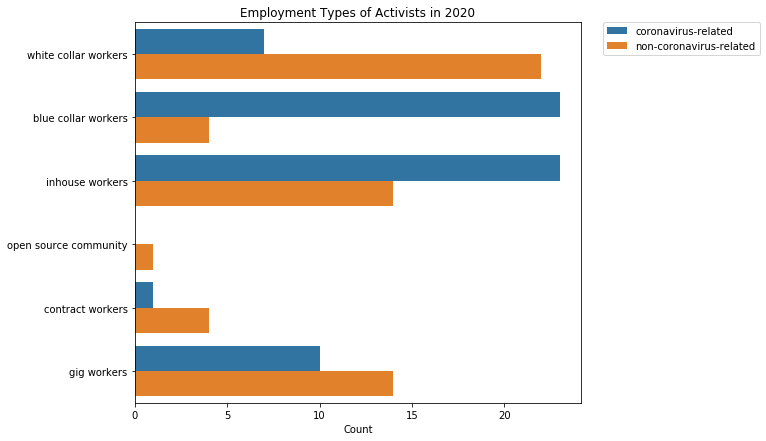

In [188]:
import seaborn as sns

lst = []
for i in df2020["employment_types"].unique():
    lst.extend(i.split(", "))

lst = list(set(lst))
lst.remove("na")

count = []
for i in lst:
    count.append(sum(df2020[df2020["coronavirus"] == "coronavirus-related"]["employment_types"].str.contains(i)))
    
coronavirus_related_col_df = pd.DataFrame({"coronavirus": "coronavirus-related", "employment_types": lst, "count": count})

count = []
for i in lst:
    count.append(sum(df2020[df2020["coronavirus"] == "non-coronavirus-related"]["employment_types"].str.contains(i)))
    
non_coronavirus_related_col_df = pd.DataFrame({"coronavirus": "non-coronavirus-related", "employment_types": lst, "count": count})

employ_df = pd.concat([coronavirus_related_col_df, non_coronavirus_related_col_df])
print(employ_df)

fig = plt.gcf()
fig.set_size_inches(8, 7)

ax = sns.barplot(y="employment_types", x="count", hue="coronavirus", data=employ_df, orient='h')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title("Employment Types of Activists in 2020")
ax.set_xlabel("Count")
ax.set_ylabel("");

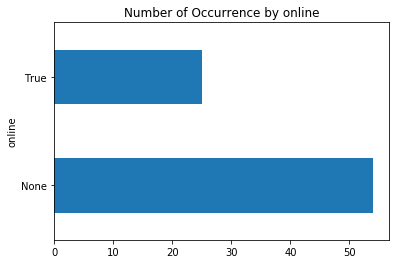

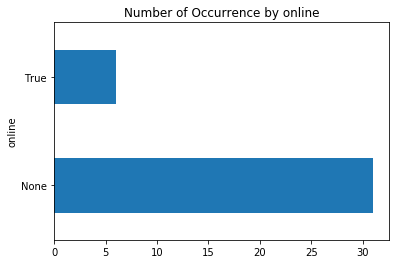

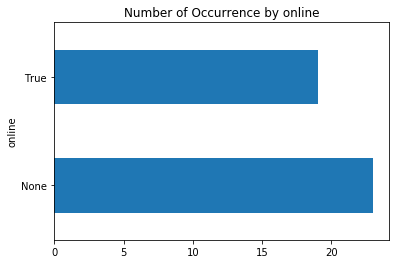

In [189]:
vizcolumn(df2020, "online")
vizcolumn(covid_df, "online")
vizcolumn(non_covid_df, "online")

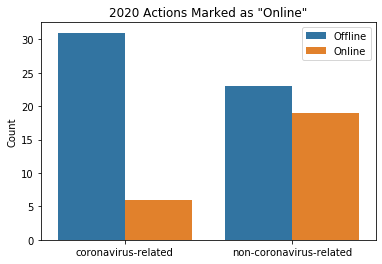

In [190]:
import seaborn as sns

online_df = df2020.groupby(["coronavirus", "online"]).count()
online_df = online_df.reset_index()

ax = sns.barplot(x="coronavirus", y="id", hue="online", data=online_df)

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Offline', 'Online'])

ax.set_title("2020 Actions Marked as \"Online\"")
ax.set_xlabel("")
ax.set_ylabel("Count");

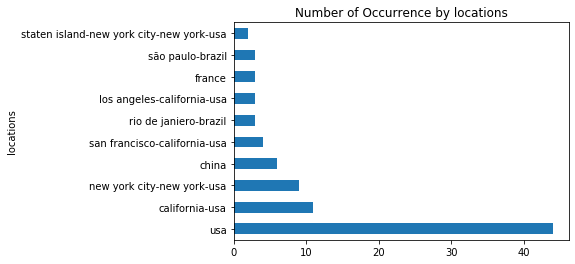

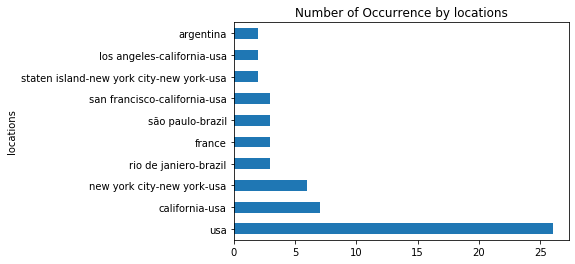

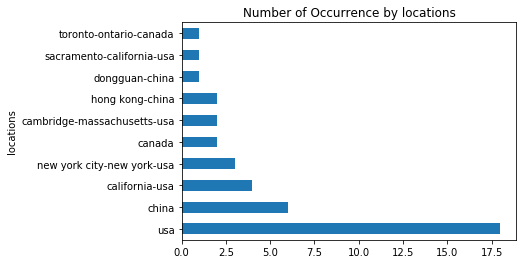

In [191]:
vizcolumn(df2020, "locations", limit = 10, remove = ["None"])
vizcolumn(covid_df, "locations", limit = 10, remove = ["None"])
vizcolumn(non_covid_df, "locations", limit = 10, remove = ["None"])

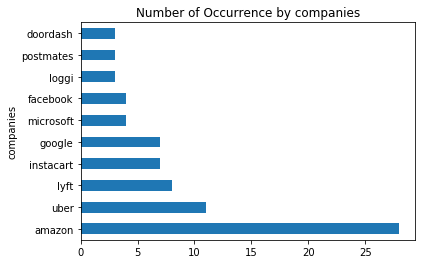

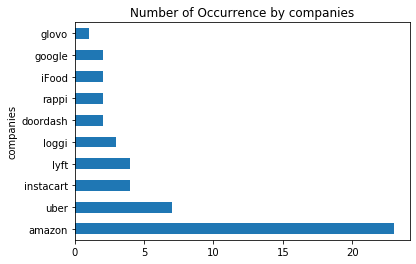

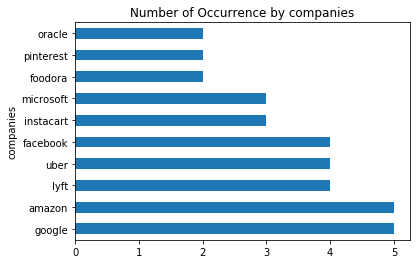

In [192]:
vizcolumn(df2020, "companies", limit = 10, remove = ["None"])
vizcolumn(covid_df, "companies", limit = 10, remove = ["None"])
vizcolumn(non_covid_df, "companies", limit = 10, remove = ["None"])

# Basic Statistics

In [193]:
len(df2020)

79

In [194]:
len(covid_df)

37

In [195]:
len(non_covid_df)

42

# Timeline of Events

Source Code: https://matplotlib.org/3.2.0/gallery/lines_bars_and_markers/timeline.html

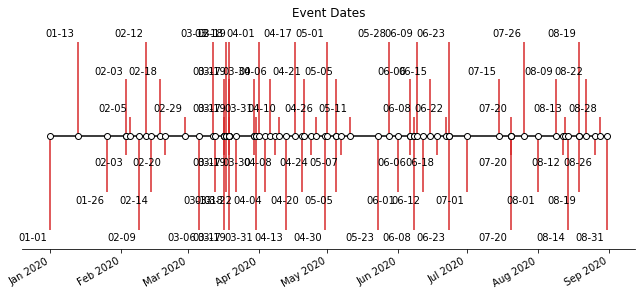

In [196]:
import matplotlib.dates as mdates

names = [str(d)[5:10] for d in df2020["date"]]

dates = df2020["date"]

# Convert date strings (e.g. 2014-10-18) to datetime
# dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="Event Dates")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")

# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=1))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.show()

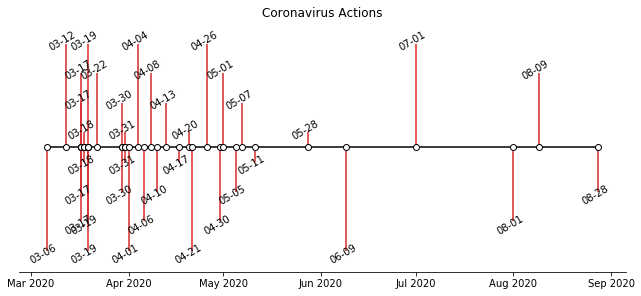

In [204]:
import matplotlib.dates as mdates

names = [str(d)[5:10] for d in covid_df["date"]]

dates = covid_df["date"]

# Convert date strings (e.g. 2014-10-18) to datetime
# dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

# Choose some nice levels
levels = np.tile([-7, 7, -5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="Coronavirus Actions")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(str(r)[:10], xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va="center", ha="center", rotation = 30)

# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=1))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), ha="center")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.show()

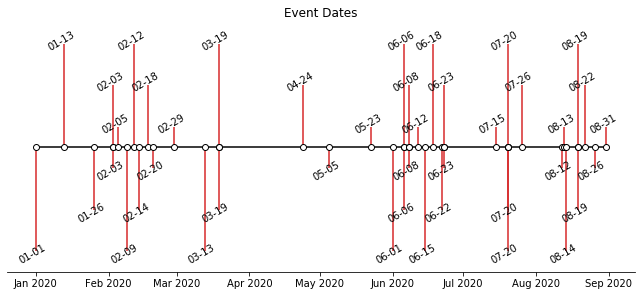

In [198]:
import matplotlib.dates as mdates

names = [str(d)[5:10] for d in non_covid_df["date"]]

dates = non_covid_df["date"]

# Convert date strings (e.g. 2014-10-18) to datetime
# dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="Event Dates")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(str(r)[:10], xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va="center", ha="center", rotation = 30)

# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=1))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), ha="center")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.show()

# 2017 - 2019 Trends

In [199]:
df2017_2019 = df[(df["date"] >= "2017") & (df["date"] <= "2019")]
df2017_2019.head()

,id,date,sources,actions,struggles,employment_types,description,online,locations,companies,workers,tags,author,latlngs,addresses
67,64,2017-01-18,https://techcrunch.com/2017/01/18/tech-employe...,protest,ethics,na,50 people in the tech community came out in th...,None,palo alto-california-usa,palantir,50,"industry_solidarity, trump",['organizejs'],"[(37.4440869, -122.16287540411753)]","['Palantir, 156, University Avenue, Palo Alto,..."
68,65,2017-01-30,https://www.bizjournals.com/sanjose/news/2017/...,union representation,pay and benefits,"contract workers, blue collar workers",In what union officials described as Silicon V...,None,san jose-california-usa,"facebook, cisco, genentech",3000,seiu,['organizejs'],"[(37.484668049999996, -122.1483654685629), (39...","['Facebook, San Francisco Bay Trail, Menlo Par..."
69,66,2017-02-01,https://www.usatoday.com/story/tech/talkingtec...,protest,ethics,na,Google employees around the world walked off t...,None,"mountain view-california-usa, worldwide",google,2000,"immigration, trump",['nataliyaned'],"[(37.41897865, -122.08237793989416)]","['Google, Mountain View, Santa Clara County, C..."
70,67,2017-02-04,https://www.businessinsider.com/facebook-emplo...,protest,ethics,na,A 'handful' of Facebook employees have vowed n...,None,usa,facebook,3,"immigration, trump",['nataliyaned'],"[(30.2691649, -97.7455041)]","['Facebook, 300, West 6th Street, Downtown, Au..."
71,68,2017-03-14,https://www.aljazeera.com/news/2017/03/silicon...,protest,"ethics, discrimination",na,Organizers say up to 1000 protesters have atte...,None,palo alto-california-usa,None,1000,industry_solidarity,['organizejs'],"[(37.4443293, -122.1598465)]","['Palo Alto, Santa Clara County, California, U..."


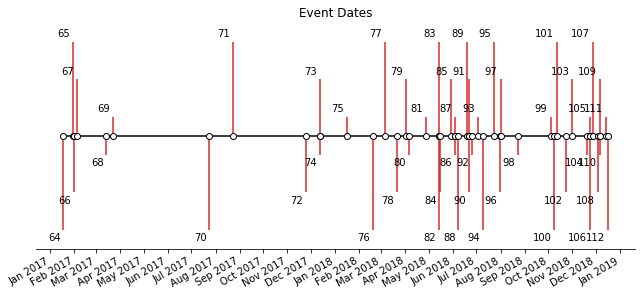

In [200]:
import matplotlib.dates as mdates

names = df2017_2019["id"]

dates = df2017_2019["date"]

# Convert date strings (e.g. 2014-10-18) to datetime
# dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="Event Dates")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")

# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=1))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.show()

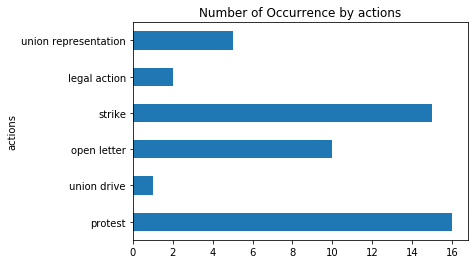

In [201]:
vizcolumn(df2017_2019, "actions")

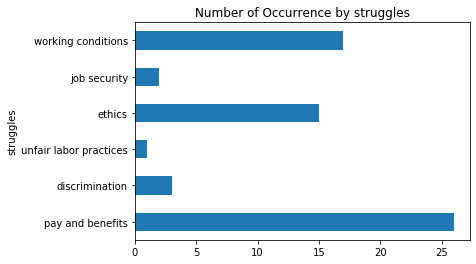

In [202]:
vizcolumn(df2017_2019, "struggles")

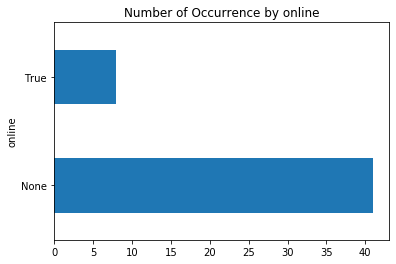

In [203]:
vizcolumn(df2017_2019, "online")